In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob
import keras
from sklearn.model_selection import train_test_split #60,20,20
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import preprocess_input

In [2]:
train_path = r"C:\Users\marco\OneDrive\Documents\Ijtsi\2\DL\Examen2\train"
val_path = r"C:\Users\marco\OneDrive\Documents\Ijtsi\2\DL\Examen2\valid"
test_path = r"C:\Users\marco\OneDrive\Documents\Ijtsi\2\DL\Examen2\test"

In [3]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img=cv2.imread(file)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img2 = cv2.resize(img, (224,224))
        img3 = preprocess_input(img2)
        x_data.append(img3) 
        y_data.append(category.split("\\")[-1])
            
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 1263/1263 [00:18<00:00, 68.72it/s]


In [4]:
data.shape

(2526, 2)

In [5]:
from collections import Counter
Counter(y_data)

Counter({'autistic': 1263, 'non_autistic': 1263})

In [6]:
x_val = [] 
y_val = [] 

for category in glob(val_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img=cv2.imread(file)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img2 = cv2.resize(img, (224, 224)) 
        img3 = preprocess_input(img2)
        x_val.append(img3) 
        y_val.append(category.split("\\")[-1])
        


100%|██████████| 100/100 [00:01<00:00, 65.17it/s]


In [7]:
x_test = [] 
y_test = [] 

for category in glob(test_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img=cv2.imread(file)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img2 = cv2.resize(img, (224, 224)) 
        img3 = preprocess_input(img2)
        x_test.append(img3) 
        y_test.append(category.split("\\")[-1])
        


100%|██████████| 100/100 [00:01<00:00, 71.59it/s]


In [8]:
x_train2= np.array(x_data)
x_val2= np.array(x_val)
x_test2= np.array(x_test)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, row in data.head(9).iterrows():  # Use .head(9) to limit to first 9 rows
    # Convert image data to numpy array
    image_np = np.frombuffer(row['image'], np.uint8)  # Assuming 'image_data' is a column in DataFrame
    image_np = np.reshape(image_np, (224, 224, 3))  # If i
    # Display image on corresponding subplot
    axes[i//3, i%3].imshow(image_np)
    axes[i//3, i%3].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()


In [9]:
for i in range(len(y_data)):
    if y_data[i]=='autistic':
        y_data[i] = [0,1]
    else:
        y_data[i]=[1,0]
        
for i in range(len(y_val)):
    if y_val[i]=='autistic':
        y_val[i] = [0,1]
    else:
        y_val[i]=[1,0]
        
for i in range(len(y_test)):
    if y_test[i]=='autistic':
        y_test[i] = [0,1]
    else:
        y_test[i]=[1,0]       

In [10]:
y_train2= np.array(y_data)
y_val2= np.array(y_val)
y_test2= np.array(y_test)
#y_train =np.expand_dims(y_train2,1) 
#y_test =np.expand_dims(y_test2,1) 
#y_val =np.expand_dims(y_val2,1) 
print(y_train2.shape)

(2526, 2)


In [11]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train2, y_train2)
x_val, y_val = shuffle(x_val2, y_val2)
x_test, y_test = shuffle(x_test2, y_test2)

In [12]:
y_train.shape

(2526, 2)

In [13]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

# Load the VGGFace model without the top (fully connected) layers
vggface_model = VGG16(include_top=False)

# Add custom top (fully connected) layers on top of VGGFace model
x = GlobalAveragePooling2D()(vggface_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='sigmoid')(x)  # Output layer with 2 neurons and sigmoid activation

# Create a new model by specifying the input and output
model = Model(inputs=vggface_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
hist=model.fit(x_train, y_train, epochs=30, batch_size = 32, validation_data=(x_val, y_val))

Epoch 1/30
79/79 [==============================] - 1059s 13s/step - loss: 2.6440 - accuracy: 0.5048 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/30
79/79 [==============================] - 1031s 13s/step - loss: 0.6913 - accuracy: 0.5146 - val_loss: 0.6914 - val_accuracy: 0.4950
Epoch 3/30
79/79 [==============================] - 1034s 13s/step - loss: 0.6850 - accuracy: 0.5483 - val_loss: 0.7282 - val_accuracy: 0.5000
Epoch 4/30
79/79 [==============================] - 1036s 13s/step - loss: 0.7032 - accuracy: 0.5190 - val_loss: 0.6838 - val_accuracy: 0.6100
Epoch 5/30
79/79 [==============================] - 1247s 16s/step - loss: 0.6724 - accuracy: 0.5713 - val_loss: 0.6779 - val_accuracy: 0.5600
Epoch 6/30
79/79 [==============================] - 1080s 14s/step - loss: 0.6093 - accuracy: 0.6591 - val_loss: 0.5844 - val_accuracy: 0.6700
Epoch 7/30
79/79 [==============================] - 853s 11s/step - loss: 0.5692 - accuracy: 0.6869 - val_loss: 0.5969 - val_accuracy: 0.6850


In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

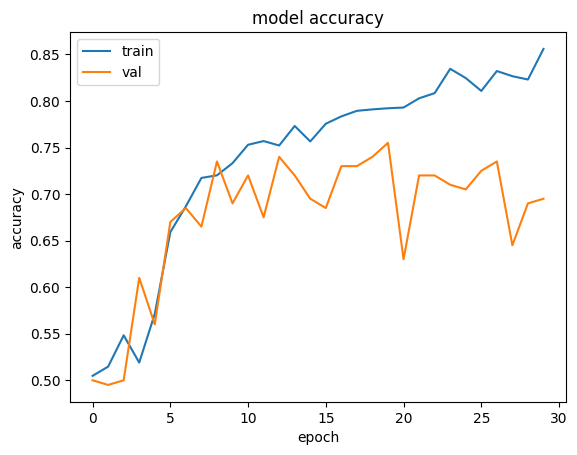

In [16]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

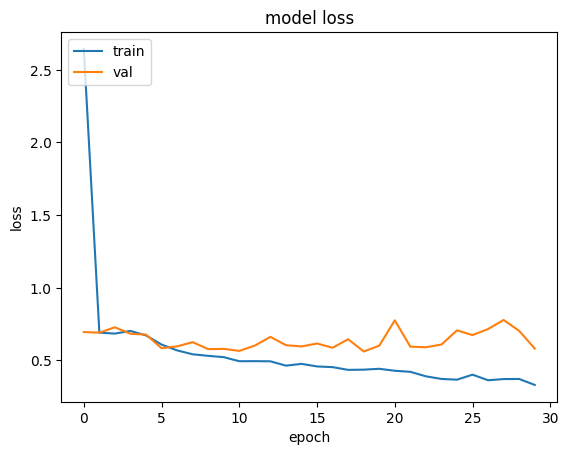

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

7/7 [==============================] - 27s 3s/step


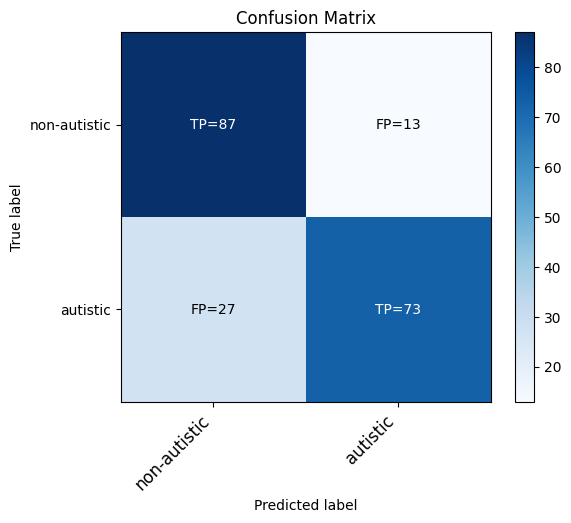

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(x_test2)
y_pred_c = np.argmax(y_pred, axis=1)
y_test_c= np.argmax(y_test2, axis=1)

class_names = ['non-autistic', 'autistic']

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_test_c, y_pred_c)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# Show TP, FP, TN, FN values in the confusion matrix
thresh = confusion_mtx.max() / 2
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        if i == j:
            ax.text(j, i, f'TP={confusion_mtx[i, j]}', ha='center', va='center', color='white' if confusion_mtx[i, j] > thresh else 'black')
        else:
            ax.text(j, i, f'FP={confusion_mtx[i, j]}', ha='center', va='center', color='white' if confusion_mtx[i, j] > thresh else 'black')

ax.set(xticks=np.arange(confusion_mtx.shape[1]),
       yticks=np.arange(confusion_mtx.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

plt.show()

In [19]:

import numpy as np
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

y_true = y_test_c
y_pred = y_pred_c

# Compute precision, F1 score, recall, and specificity
precision = precision_score(y_true, y_pred, average='macro')
f1_score = f1_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
specificity = accuracy_score(y_true[y_true == 0], y_pred[y_true == 0])


# Print the computed metrics
print("Precision:", precision)
print("F1 Score:", f1_score)
print("Recall:", recall)
print("Specificity:", specificity)

Precision: 0.8059975520195839
F1 Score: 0.7990151743543362
Recall: 0.8
Specificity: 0.87


In [20]:
model.save('autism.h5')
model.save_weights('autism_weights.h5')

In [36]:
ijtsi_path= r'C:\Users\marco\Downloads\Test_autism'

x = [] 
y = [] 

for file in glob(ijtsi_path+'/*'):
    img=cv2.imread(file)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.resize(img, (224,224))
    img3 = preprocess_input(img2)
    x.append(img2) 
    y.append(category.split("\\")[-1])
            

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


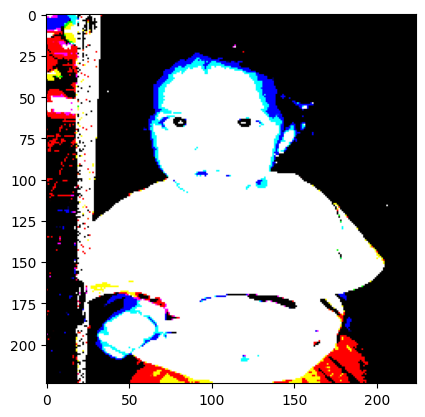

In [35]:
plt.imshow(x[2])
plt.show()


In [37]:

x2=np.array(x)
x3=shuffle(x2)

In [38]:
y_pred = model.predict(x3)
y_pred_c = np.argmax(y_pred, axis=1)


print(y_pred)
print(y_pred_c)

1/1 [==============================] - 2s 2s/step
[[2.5450171e-04 9.9975467e-01]
 [2.6503330e-01 7.3910898e-01]
 [7.2873160e-02 9.2661059e-01]
 [2.2446655e-02 9.7689611e-01]
 [5.3663339e-02 9.3974918e-01]
 [2.6324013e-01 7.3267603e-01]
 [3.3025779e-02 9.6885735e-01]
 [1.6026674e-02 9.8401767e-01]
 [1.8594371e-01 7.9587424e-01]
 [2.8213657e-02 9.7356379e-01]]
[1 1 1 1 1 1 1 1 1 1]
